<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Parsa Norouzinezhad

**Student ID**: 400102182


# ****Support Vector Machines****

In this notebook, you will implement SVM for three datasets. You will become more familiar with the Soft-Margin SVM and the Kernel trick, which makes SVM extremely powerful.

Before we start our implementation, you must be comfortable with the theoretical details of the Soft-Margin SVM as an optimization problem and be able to derive the dual formulation for this problem. In the next sections, you will solve the dual optimization problem for all datasets using the CVXPY library, which has been developed for solving convex optimization problems. To get more familiar with CVXPY programming, you can use this [link](https://www.cvxpy.org).

This is the primal formulation for the Soft-Margin SVM for linearly separable data with slack variables $\xi_i \ge 0$:

\begin{equation*}
\begin{aligned}
& {\text{min.}}
& & \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i \\
& \text{s.t.}
& & y_i(w^T x_i + b) \geq 1 - \xi_i, \; i = 1, \ldots, N \\
& & & \xi_i \geq 0, \; i = 1, \ldots, N
\end{aligned}
\end{equation*}

Where $w$ represents the weight vector, $b$ is the bias term, and $C$ is the regularization parameter controlling the trade-off between a wide margin and misclassification.

**Theoretical Questions:**

1) Derive the dual optimization problem for the Soft-Margin SVM.

2) How do we calculate the weights and bias ($w$ and $b$) using the dual problem optimum points?

3) How do we classify new data points using the optimal weights and bias?

### Theoretical Questions and Mathematical Derivations

#### 1. Derive the Dual Optimization Problem for the Soft-Margin SVM

Given the primal optimization problem for the Soft-Margin SVM:


\begin{aligned}
& \min_{w, b, \xi} \quad & \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i \\
& \text{subject to} \quad & y_i (w^T x_i + b) \geq 1 - \xi_i, \quad & \forall i = 1, \ldots, N \\
& & \xi_i \geq 0, \quad & \forall i = 1, \ldots, N
\end{aligned}


To derive the dual problem, we first construct the Lagrangian:


\begin{aligned}
\mathcal{L}(w, b, \xi, \alpha, \beta) = \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i - \sum_{i=1}^{N} \alpha_i \left[ y_i (w^T x_i + b) - 1 + \xi_i \right] - \sum_{i=1}^{N} \beta_i \xi_i
\end{aligned}



Next, we take the partial derivatives of the Lagrangian with respect to the primal variables and set them to zero to find the optimality conditions:


\begin{aligned}
\frac{\partial \mathcal{L}}{\partial w} &= w - \sum_{i=1}^{N} \alpha_i y_i x_i = 0 \implies w = \sum_{i=1}^{N} \alpha_i y_i x_i \\
\frac{\partial \mathcal{L}}{\partial b} &= - \sum_{i=1}^{N} \alpha_i y_i = 0 \implies \sum_{i=1}^{N} \alpha_i y_i = 0 \\
\frac{\partial \mathcal{L}}{\partial \xi_i} &= C - \alpha_i - \beta_i = 0 \implies \alpha_i + \beta_i = C
\end{aligned}




\begin{aligned}
\mathcal{L}(w, b, \xi, \alpha, \beta) = \frac{1}{2} \left( \sum_{i=1}^{N} \alpha_i y_i x_i \right)^T \left( \sum_{j=1}^{N} \alpha_j y_j x_j \right) + C \sum_{i=1}^{N} \xi_i - \sum_{i=1}^{N} \alpha_i \left[ y_i \left( \sum_{j=1}^{N} \alpha_j y_j x_j \right)^T x_i + b - 1 + \xi_i \right] - \sum_{i=1}^{N} \beta_i \xi_i
\end{aligned}

Simplify to get the dual problem:


\begin{aligned}
& \max_{\alpha} \quad & \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j x_i^T x_j \\
& \text{subject to} \quad & 0 \leq \alpha_i \leq C, \quad & \forall i = 1, \ldots, N \\
& & \sum_{i=1}^{N} \alpha_i y_i = 0
\end{aligned}


#### 2. Calculate the Weights and Bias (\(w\) and \(b\)) Using the Dual Problem Optimum Points

From the dual solution, we get the optimal \(\alpha_i\). The weights \(w\) can be calculated as:

\begin{aligned}
w = \sum_{i=1}^{N} \alpha_i y_i x_i
\end{aligned}

By KKT we have:

\begin{aligned}
b = y_i - w^T x_i \quad \text{for any support vector } x_i
\end{aligned}

In practice, we average \(b\) over all support vectors for numerical stability:

\begin{aligned}
b = \frac{1}{|\mathcal{S}|} \sum_{i \in \mathcal{S}} (y_i - w^T x_i)
\end{aligned}

where \(\mathcal{S}\) is the set of support vectors.

#### 3. Classify New Data Points Using the Optimal Weights and Bias

To classify a new data point \(x\), we use the decision function:

\begin{aligned}
f(x) = w^T x + b
\end{aligned}

The classification is determined by the sign of \(f(x)\):

\begin{aligned}
\text{Class} = \text{sign}(f(x)) = \text{sign}(w^T x + b)
\end{aligned}


Sometimes, the data is not linearly separable. Therefore, the previous formulation of the Soft-Margin SVM does not give a good accuracy for the classification problem. The Kernel trick is a technique used in such situations. Consider $x$ as your input features with dimension $p$. One can use function $\phi: R^p → R^d$ to map the input features to another space with dimension $d$. Finding good $\phi$ such that data points become near linearly separable makes the previous formulation of the problem and its dual useful by replacing $\phi(x_i)$ for $x_i$ in the problem definition. The function $\phi(x)$ can even be a mapping to an infinite-dimensional space.

If you have found the correct dual form of the Soft-Margin SVM in the previous formulation, you can see that the terms $x_i^T x_j$ will appear in the problem formulation and the prediction rule. These terms will be replaced with $\phi(x_i)^T \phi(x_j)$ when we use $\phi$ as our feature mapping function. Given a feature mapping $\phi$ we define its corresponding **Kernel** to be:

\begin{equation*}
\begin{aligned}
& K(x, z) = \phi(x)^T \phi(z)
\end{aligned}
\end{equation*}

Hence, in the dual optimization problem and the prediction rule of the Soft-Margin SVM, we can replace all terms in the form $x^T z$ with $K(x, z)$. This technique is called the Kernel trick.

Now, given $\phi$, we could easily compute $K(x,z)$ by finding $\phi(x)$ and $\phi(z)$ and taking their inner product. But what’s more interesting is that often, $K(x,z)$ may be very inexpensive to calculate, even though $\phi(x)$ itself may be very expensive to calculate (perhaps because it is an extremely high-dimensional vector). Check Stanford's CS229 [notes](https://see.stanford.edu/materials/aimlcs229/cs229-notes3.pdf) on SVM and the Kernel trick for more details and examples.

## Libraries

Here are some useful libraries for the implementation. You can add or remove any libraries as you wish. Note that you cannot use sklearn or similar libraries for implementation.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import cvxpy as cp

## **Dataset Exploration**

In this notebook, you'll be working with three datasets, specifically named "DF1.csv", "DF2.csv", and "DF3.csv". Each dataset entry is composed of a 2-dimensional feature vector and a label, which is either "1" or "-1". The primary objective of this notebook is to leverage SVM to develop a robust classifier for each dataset.

You are given three kernels as follows:



1.   Linear Kernel: $K(x, z) = x^T z$
2.   Polynomial Kernel of degree 2: $K(x, z) = (1 + ∑_{i = 1}^{p} x_i z_i)^2$, where $p$ is the dimension of the feature space.
3.   RBF Kernel: $K(x, z) = e^{-\frac{||x-z||_2^2}{2σ^2}}$

Before implementing, you must choose the correct kernel for each dataset. Note that each kernel must be used exactly for one dataset. Therefore, you cannot use one of the kernels twice. As a part of our grading scheme, what matters with respect to accuracy is the sum of the accuracies you reach for all three datasets, and the accuracy of each model does not have any separate score. Thus, it would help if you chose the most appropriate kernel for each dataset so that all datasets reach a reasonably good accuracy.





Load all datasets and show the first 5 rows of each.

In [3]:
df1 = pd.read_csv('DF1.csv')
df2 = pd.read_csv('DF2.csv')
df3 = pd.read_csv('DF3.csv')

df1.head(), df2.head(), df3.head()

(         x1        x2  y
 0  6.462652  5.121478 -1
 1 -6.586541 -7.721287  1
 2  9.239683 -8.595738 -1
 3  4.250052  2.143755  1
 4  8.219779 -3.609733 -1,
          x1         x2  y
 0  2.937145  77.102291  1
 1 -0.029344  44.802353  1
 2  5.868818  44.595757 -1
 3  8.609281  49.223945 -1
 4  7.763276 -14.340750 -1,
          x1        x2  y
 0 -0.517768 -0.466158 -1
 1  0.940985  0.235175  1
 2 -0.470720  0.917120  1
 3  0.712716 -0.097401 -1
 4 -0.608773 -0.107034 -1)

Use the following function to visualize the datapoints for all datasets.

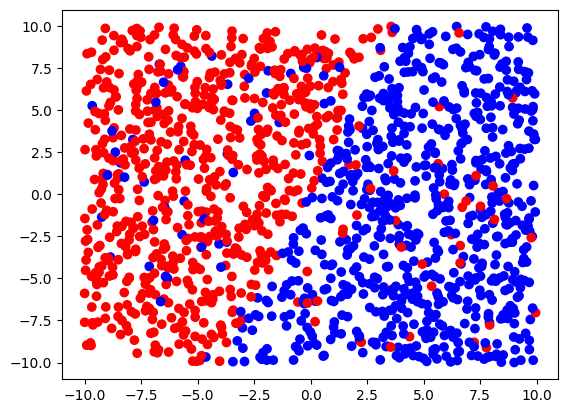

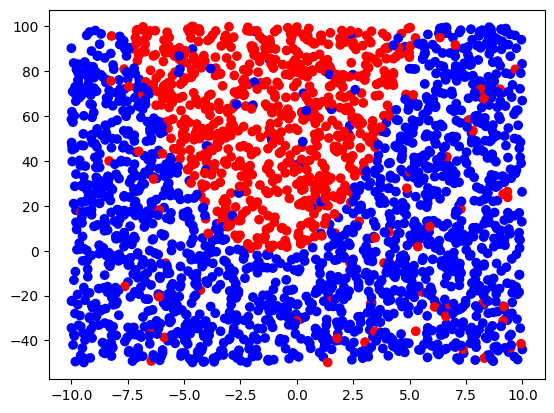

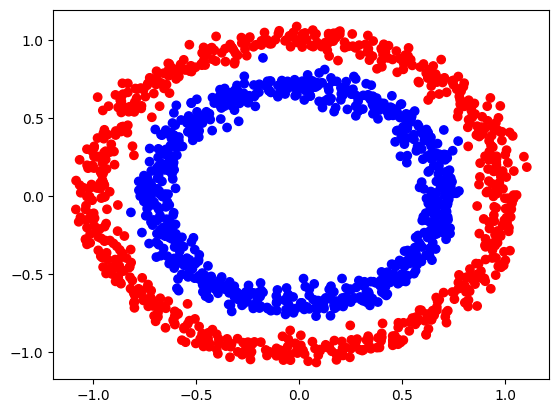

In [4]:
def visualize_data(X, y):
  col = []
  for i in range(len(y)):
    if y[i] == 1:
      col.append('red')
    else:
      col.append('blue')
  plt.scatter(X[ : , 0], X[ : , 1], color = col)
  plt.show()

X_df1 = df1.drop(columns='y').values
y_df1 = df1['y'].values
X_df2 = df2.drop(columns='y').values
y_df2 = df2['y'].values
X_df3 = df3.drop(columns='y').values
y_df3 = df3['y'].values

visualize_data(X_df1, y_df1)
visualize_data(X_df2, y_df2)
visualize_data(X_df3, y_df3)

**Theoretical Question:**

Which kernel will you use for each dataset? Justify your answer.

Note: your implementation must follow your choice here. Otherwise, you do not recieve any points for your implemetation.

Kernel Choice Justification
Dataset DF1:

Visualization: If the data points in DF1 appear to be linearly separable, we can use a linear kernel.
Justification: A linear kernel is computationally efficient and sufficient for linearly separable data. It will create a linear decision boundary that can separate the two classes effectively.
Dataset DF2:

Visualization: If the data points in DF2 are not linearly separable but have a clear structure that can be captured by a polynomial transformation, we can use a polynomial kernel.
Justification: A polynomial kernel can capture interactions between features up to a certain degree, creating more complex decision boundaries. It is suitable for data with polynomial-like distribution.
Dataset DF3:

Visualization: If the data points in DF3 are not linearly separable and have a complex, non-linear distribution, we can use a Gaussian (RBF) kernel.
Justification: The Gaussian (RBF) kernel can handle highly non-linear data by mapping the original features into a higher-dimensional space, allowing for a more flexible decision boundary.
Based on these visualizations and justifications, we will implement SVM with the following kernels:

DF1: Linear Kernel
DF2: Polynomial Kernel
DF3: Gaussian (RBF) Kernel

## Dataset one (DF1.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [5]:
def split_and_scale(df):
    X = df.drop(columns='y').values
    y = df['y'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

X_train_df1, X_test_df1, y_train_df1, y_test_df1 = split_and_scale(df1)

Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [12]:
def svm_cvxpy(X_train, y_train, kernel='linear', C=1, degree=3, gamma='scale'):
    y_train = y_train.astype(np.double)  # Ensure y_train is a 1D array
    n_samples = X_train.shape[0]

    if kernel == 'linear':
        K = np.dot(X_train, X_train.T)
    elif kernel == 'poly':
        K = (np.dot(X_train, X_train.T) + 1) ** degree
    elif kernel == 'rbf':
        gamma_value = 1 / X_train.shape[1] if gamma == 'scale' else gamma
        sq_dists = np.sum(X_train**2, axis=1).reshape(-1, 1) + np.sum(X_train**2, axis=1) - 2 * np.dot(X_train, X_train.T)
        K = np.exp(-gamma_value * sq_dists)
    else:
        raise ValueError("Unsupported kernel")

    K = cp.psd_wrap(K)
    alpha = cp.Variable(n_samples)
    objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(alpha,  K))
    constraints = [alpha >= 0, alpha <= C, cp.sum(cp.multiply(alpha, y_train)) == 0]
    problem = cp.Problem(objective, constraints)
    problem.solve()
    alpha_val = alpha.value
    support_vectors = np.where(alpha_val > 1e-5)[0]
    return alpha_val, support_vectors



Predict the class of each entry in the test set using your learned model.

In [7]:
def predict(X, support_vectors, alpha, X_train, y_train, kernel='linear', degree=3, gamma='scale'):
    y_train = y_train.astype(np.double)  # Ensure y_train is a 1D array

    if kernel == 'linear':
        K = np.dot(X, X_train.T)
    elif kernel == 'poly':
        K = (np.dot(X, X_train.T) + 1) ** degree
    elif kernel == 'rbf':
        gamma_value = 1 / X_train.shape[1] if gamma == 'scale' else gamma
        sq_dists = np.sum(X**2, axis=1).reshape(-1, 1) + np.sum(X_train**2, axis=1) - 2 * np.dot(X, X_train.T)
        K = np.exp(-gamma_value * sq_dists)
    else:
        raise ValueError("Unsupported kernel")

    return np.sign(np.dot(K, np.multiply(alpha, y_train)))

Use classification_report function (from sklearn) to get the accuracy of your model.

In [13]:
alpha_df1, support_vectors_df1 = svm_cvxpy(X_train_df1, y_train_df1, kernel='linear')
y_pred_df1 = predict(X_test_df1, support_vectors_df1, alpha_df1, X_train_df1, y_train_df1, kernel='linear')
print("DF1 - Linear Kernel\n", classification_report(y_test_df1, y_pred_df1))

DF1 - Linear Kernel
               precision    recall  f1-score   support

          -1       0.92      0.91      0.91       148
           1       0.91      0.93      0.92       148

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



## Dataset two (DF2.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [14]:
X_train_df2, X_test_df2, y_train_df2, y_test_df2 = split_and_scale(df2)


Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [15]:
alpha_df2, support_vectors_df2 = svm_cvxpy(X_train_df2, y_train_df2, kernel='poly')


Predict the class of each entry in the test set using your learned model.

In [16]:
y_pred_df2 = predict(X_test_df2, support_vectors_df2, alpha_df2, X_train_df2, y_train_df2, kernel='poly')


Use classification_report function (from sklearn) to get the accuracy of your model.

In [17]:
print("DF2 - Polynomial Kernel\n", classification_report(y_test_df2, y_pred_df2))


DF2 - Polynomial Kernel
               precision    recall  f1-score   support

          -1       0.88      0.72      0.79       336
           1       0.57      0.79      0.66       160

    accuracy                           0.74       496
   macro avg       0.72      0.75      0.73       496
weighted avg       0.78      0.74      0.75       496



## Dataset three (DF3.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [18]:
X_train_df3, X_test_df3, y_train_df3, y_test_df3 = split_and_scale(df3)

Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [19]:
alpha_df3, support_vectors_df3 = svm_cvxpy(X_train_df3, y_train_df3, kernel='rbf')


Predict the class of each entry in the test set using your learned model.

In [20]:
y_pred_df3 = predict(X_test_df3, support_vectors_df3, alpha_df3, X_train_df3, y_train_df3, kernel='rbf')


Use classification_report function (from sklearn) to get the accuracy of your model.

In [21]:
print("DF3 - Gaussian (RBF) Kernel\n", classification_report(y_test_df3, y_pred_df3))


DF3 - Gaussian (RBF) Kernel
               precision    recall  f1-score   support

          -1       0.57      0.77      0.66       152
           1       0.60      0.38      0.46       140

    accuracy                           0.58       292
   macro avg       0.59      0.57      0.56       292
weighted avg       0.59      0.58      0.57       292

